In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotx
import pandas as pd
from fastcore.xtras import load_pickle
from scipy.stats import sem

from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH
from gptchem.evaluator import find_learning_curve_intersection, fit_learning_curve, lc

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(["science", "nature"])

%matplotlib inline

## Load results

In [21]:
all_out = glob("out/**/*.pkl")

In [22]:
all_out = [load_pickle(p) for p in all_out]

In [23]:
extracted_res = []
xgboost_results = []
tabpfn_results = []

for out in all_out:
    try:
        res = {
            "train_size": out["train_size"],
            "frac_valid": out["frac_valid"],
            "accuracy": out["accuracy"],
            "f1_macro": out["f1_macro"],
            "f1_micro": out["f1_micro"],
            "kappa": out["kappa"],
            "num_classes": out["num_classes"],
            "target": out["target"],
        }
        extracted_res.append(res)
    except KeyError:
        pass

    xgb_res = {
        "train_size": out["train_size"],
        "accuracy": out["baseline"]["xgb_metrics"]["accuracy"],
        "f1_macro": out["baseline"]["xgb_metrics"]["f1_macro"],
        "f1_micro": out["baseline"]["xgb_metrics"]["f1_micro"],
        "kappa": out["baseline"]["xgb_metrics"]["kappa"],
        "num_classes": out["num_classes"],
        "target": out["target"],
    }

    tabpfn_res = {
        "train_size": out["train_size"],
        "accuracy": out["baseline"]["tabpfn_metrics"]["accuracy"],
        "f1_macro": out["baseline"]["tabpfn_metrics"]["f1_macro"],
        "f1_micro": out["baseline"]["tabpfn_metrics"]["f1_micro"],
        "kappa": out["baseline"]["tabpfn_metrics"]["kappa"],
        "num_classes": out["num_classes"],
        "target": out["target"],
    }

    xgboost_results.append(xgb_res)
    tabpfn_results.append(tabpfn_res)

In [24]:
res = pd.DataFrame(extracted_res)
xgboost_res = pd.DataFrame(xgboost_results)
tabpfn_res = pd.DataFrame(tabpfn_results)

In [25]:
res

,train_size,frac_valid,accuracy,f1_macro,f1_micro,kappa,num_classes,target
0,10,1.000,0.228000,0.155294,0.228000,0.035000,5,"(logKH_CH4, CH4 Henry coefficient)"
1,20,1.000,0.508000,0.507614,0.508000,0.016000,2,"(logKH_CH4, CH4 Henry coefficient)"
2,10,1.000,0.556000,0.514614,0.556000,0.112000,2,"(logKH_CO2, CO2 Henry coefficient)"
3,10,1.000,0.556000,0.553937,0.556000,0.112000,2,"(logKH_CO2, CO2 Henry coefficient)"
4,100,1.000,0.576000,0.575973,0.576000,0.152000,2,"(logKH_CH4, CH4 Henry coefficient)"
5,500,1.000,0.328000,0.328652,0.328000,0.160000,5,"(logKH_CH4, CH4 Henry coefficient)"
6,10,1.000,0.536000,0.529221,0.536000,0.072000,2,"(logKH_CH4, CH4 Henry coefficient)"
7,20,1.000,0.524000,0.520617,0.524000,0.048000,2,"(logKH_CH4, CH4 Henry coefficient)"
8,200,1.000,0.288000,0.282675,0.288000,0.110000,5,"(logKH_CO2, CO2 Henry coefficient)"
9,200,1.000,0.516000,0.515061,0.516000,0.032000,2,"(logKH_CH4, CH4 Henry coefficient)"


In [26]:
grouped_res = res.groupby(["num_classes", "target", "train_size"]).agg(["mean", "std", sem])

In [27]:
grouped_xgboost_res = xgboost_res.groupby(["num_classes", "target", "train_size"]).agg(
    ["mean", "std", sem]
)

In [28]:
grouped_tabpfn_res = tabpfn_res.groupby(["num_classes", "target", "train_size"]).agg(
    ["mean", "std", sem]
)

In [29]:
grouped_res.loc[2, :]

frac_valid           accuracy  \
                                                    mean  std  sem     mean   
target                             train_size                                 
(logKH_CH4, CH4 Henry coefficient) 10                1.0  0.0  0.0   0.5336   
                                   20                1.0  0.0  0.0   0.5160   
                                   50                1.0  0.0  0.0   0.5360   
                                   100               1.0  NaN  NaN   0.5760   
                                   200               1.0  NaN  NaN   0.5160   
                                   500               1.0  NaN  NaN   0.6240   
(logKH_CO2, CO2 Henry coefficient) 10                1.0  0.0  0.0   0.5176   
                                   20                1.0  0.0  0.0   0.5180   
                                   50                1.0  NaN  NaN   0.5680   
                                   200               1.0  NaN  NaN   0.5680   

                                                                   f1_macro  \
                                                    std       sem      mean   
target                             train_size                                 
(logKH_CH4, CH4 Henry coefficient) 10          0.045572  0.020380  0.516830   
                                   20          0.011314  0.008000  0.514116   
                                   50          0.000000  0.000000  0.534928   
                                   100              NaN       NaN  0.575973   
                                   200              NaN       NaN  0.515061   
                                   500              NaN       NaN  0.623132   
(logKH_CO2, CO2 Henry coefficient) 10          0.043322  0.019374  0.504776   
                                   20          0.008485  0.006000  0.503195   
                                   50               NaN       NaN  0.567889   
                                   200              NaN       NaN  0.567557   

                                                                  f1_micro  \
                                                    std       sem     mean   
target                             train_size                                
(logKH_CH4, CH4 Henry coefficient) 10          0.034869  0.015594   0.5336   
                                   20          0.009195  0.006502   0.5160   
                                   50          0.000000  0.000000   0.5360   
                                   100              NaN       NaN   0.5760   
                                   200              NaN       NaN   0.5160   
                                   500              NaN       NaN   0.6240   
(logKH_CO2, CO2 Henry coefficient) 10          0.036657  0.016394   0.5176   
                                   20          0.010281  0.007270   0.5180   
                                   50               NaN       NaN   0.5680   
                                   200              NaN       NaN   0.5680   

                                                                    kappa  \
                                                    std       sem    mean   
target                             train_size                               
(logKH_CH4, CH4 Henry coefficient) 10          0.045572  0.020380  0.0672   
                                   20          0.011314  0.008000  0.0320   
                                   50          0.000000  0.000000  0.0720   
                                   100              NaN       NaN  0.1520   
                                   200              NaN       NaN  0.0320   
                                   500              NaN       NaN  0.2480   
(logKH_CO2, CO2 Henry coefficient) 10          0.043322  0.019374  0.0352   
                                   20          0.008485  0.006000  0.0360   
                                   50               NaN       NaN  0.1360   
                                   200             

In [30]:
grouped_xgboost_res

accuracy            \
                                                              mean       std   
num_classes target                             train_size                      
2           (logKH_CH4, CH4 Henry coefficient) 10            0.500  0.000000   
                                               20            0.526  0.127279   
                                               50            0.606  0.138593   
                                               100           0.744       NaN   
                                               200           0.772       NaN   
                                               500           0.792       NaN   
            (logKH_CO2, CO2 Henry coefficient) 10            0.500  0.000000   
                                               20            0.592  0.073539   
                                               50            0.640       NaN   
                                               200           0.708       NaN   
5           (logKH_CH4, CH4 Henry coefficient) 10            0.200       NaN   
                                               20            0.258  0.070711   
                                               50            0.320  0.050912   
                                               200           0.424       NaN   
                                               500           0.496       NaN   
            (logKH_CO2, CO2 Henry coefficient) 10            0.200       NaN   
                                               20            0.200       NaN   
                                               50            0.272       NaN   
                                               200           0.284       NaN   
                                               500           0.432       NaN   

                                                                  f1_macro  \
                                                             sem      mean   
num_classes target                             train_size                    
2           (logKH_CH4, CH4 Henry coefficient) 10          0.000  0.333333   
                                               20          0.090  0.519975   
                                               50          0.098  0.605769   
                                               100           NaN  0.743409   
                                               200           NaN  0.771909   
                                               500           NaN  0.791947   
            (logKH_CO2, CO2 Henry coefficient) 10          0.000  0.333333   
                                               20          0.052  0.589897   
                                               50            NaN  0.636651   
                                               200           NaN  0.707771   
5           (logKH_CH4, CH4 Henry coefficient) 10            NaN  0.066667   
                                               20          0.050  0.260082   
                                               50          0.036  0.321284   
                                               200           NaN  0.420356   
                                               500           NaN  0.484021   
            (logKH_CO2, CO2 Henry coefficient) 10            NaN  0.066667   
                                               20            NaN  0.191643   
                                               50            NaN  0.278736   
                                               200           NaN  0.282622   
                                               500           NaN  0.429590   

                                                                               \
                                                                std       sem   
num_classes target                             train_size                       
2           (logKH_CH4, CH4 Henry coefficient) 10          0.000000  0.000000   
                                               20          0.125567  0.088789   
                 

In [31]:
grouped_res.loc[2, :].index[0][0]

('logKH_CH4', 'CH4 Henry coefficient')

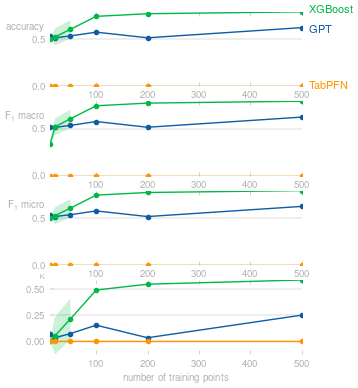

In [32]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
        ax[i].plot(
            grouped_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :].index,
            grouped_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"],
            marker="o",
            label="GPT",
        )
        ax[i].fill_between(
            grouped_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :].index,
            grouped_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"]
            - grouped_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["sem"],
            grouped_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"]
            + grouped_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_xgboost_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :].index,
            grouped_xgboost_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"],
            marker="o",
            label="XGBoost",
        )
        ax[i].fill_between(
            grouped_xgboost_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :].index,
            grouped_xgboost_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"]
            - grouped_xgboost_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["sem"],
            grouped_xgboost_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"]
            + grouped_xgboost_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_tabpfn_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :].index,
            grouped_tabpfn_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"],
            marker="o",
            label="TabPFN",
        )
        ax[i].fill_between(
            grouped_tabpfn_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :].index,
            grouped_tabpfn_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"]
            - grouped_tabpfn_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["sem"],
            grouped_tabpfn_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"]
            + grouped_tabpfn_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["sem"],
            alpha=0.2,
        )

    matplotx.ylabel_top("accuracy", ax=ax[0])
    matplotx.ylabel_top(r"F$_{1}$ macro", ax=ax[1])
    matplotx.ylabel_top(r"F$_{1}$ micro", ax=ax[2])
    matplotx.ylabel_top(r"$\kappa$", ax=ax[3])
    ax[-1].set_xlabel("number of training points", labelpad=4)
    matplotx.line_labels(ax=ax[0], fontsize=8)

    fig.savefig("logKHCH4-classification_results_binary.pdf", bbox_inches="tight")

In [33]:
find_learning_curve_intersection(
    grouped_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_xgboost_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :].index,
        grouped_xgboost_res.loc[2, ("logKH_CH4", "CH4 Henry coefficient"), :]["f1_macro"]["mean"],
    )[0],
) / 10

2.217450236062213

In [34]:
find_learning_curve_intersection(
    grouped_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :]["f1_macro"]["mean"].values[0],
    fit_learning_curve(
        grouped_xgboost_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :].index,
        grouped_xgboost_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :]["f1_macro"]["mean"],
    )[0],
) / 10

1.710642370858033

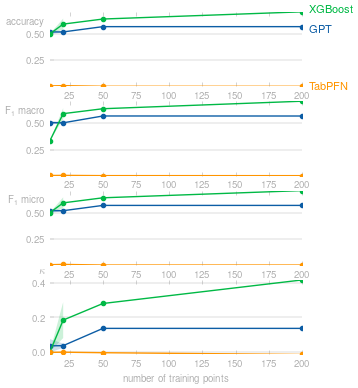

In [35]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
        ax[i].plot(
            grouped_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :].index,
            grouped_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :][metric]["mean"],
            marker="o",
            label="GPT",
        )
        ax[i].fill_between(
            grouped_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :].index,
            grouped_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :][metric]["mean"]
            - grouped_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :][metric]["sem"],
            grouped_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :][metric]["mean"]
            + grouped_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_xgboost_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :].index,
            grouped_xgboost_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :][metric]["mean"],
            marker="o",
            label="XGBoost",
        )
        ax[i].fill_between(
            grouped_xgboost_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :].index,
            grouped_xgboost_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :][metric]["mean"]
            - grouped_xgboost_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :][metric]["sem"],
            grouped_xgboost_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :][metric]["mean"]
            + grouped_xgboost_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :][metric]["sem"],
            alpha=0.2,
        )

        ax[i].plot(
            grouped_tabpfn_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :].index,
            grouped_tabpfn_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :][metric]["mean"],
            marker="o",
            label="TabPFN",
        )
        ax[i].fill_between(
            grouped_tabpfn_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :].index,
            grouped_tabpfn_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :][metric]["mean"]
            - grouped_tabpfn_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :][metric]["sem"],
            grouped_tabpfn_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :][metric]["mean"]
            + grouped_tabpfn_res.loc[2, ("logKH_CO2", "CO2 Henry coefficient"), :][metric]["sem"],
            alpha=0.2,
        )

    matplotx.ylabel_top("accuracy", ax=ax[0])
    matplotx.ylabel_top(r"F$_{1}$ macro", ax=ax[1])
    matplotx.ylabel_top(r"F$_{1}$ micro", ax=ax[2])
    matplotx.ylabel_top(r"$\kappa$", ax=ax[3])
    ax[-1].set_xlabel("number of training points", labelpad=4)
    matplotx.line_labels(ax=ax[0], fontsize=8)

    fig.savefig("logKHCO2-classification_results_binary.pdf", bbox_inches="tight")

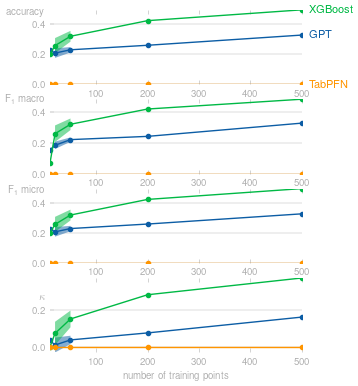

In [36]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

    # plot the binary case, i.e. num_classes = 2

    for i, metric in enumerate(["accuracy", "f1_macro", "f1_micro", "kappa"]):
        ax[i].plot(
            grouped_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :].index,
            grouped_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"],
            marker="o",
            label="GPT",
        )
        ax[i].fill_between(
            grouped_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :].index,
            grouped_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"]
            - grouped_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["sem"],
            grouped_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"]
            + grouped_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["sem"],
            alpha=0.5,
        )

        ax[i].plot(
            grouped_xgboost_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :].index,
            grouped_xgboost_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"],
            marker="o",
            label="XGBoost",
        )
        ax[i].fill_between(
            grouped_xgboost_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :].index,
            grouped_xgboost_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"]
            - grouped_xgboost_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["sem"],
            grouped_xgboost_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"]
            + grouped_xgboost_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["sem"],
            alpha=0.5,
        )

        ax[i].plot(
            grouped_tabpfn_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :].index,
            grouped_tabpfn_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"],
            marker="o",
            label="TabPFN",
        )
        ax[i].fill_between(
            grouped_tabpfn_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :].index,
            grouped_tabpfn_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"]
            - grouped_tabpfn_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["sem"],
            grouped_tabpfn_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["mean"]
            + grouped_tabpfn_res.loc[5, ("logKH_CH4", "CH4 Henry coefficient"), :][metric]["sem"],
            alpha=0.5,
        )

    matplotx.ylabel_top("accuracy", ax=ax[0])
    matplotx.ylabel_top(r"F$_{1}$ macro", ax=ax[1])
    matplotx.ylabel_top(r"F$_{1}$ micro", ax=ax[2])
    matplotx.ylabel_top(r"$\kappa$", ax=ax[3])
    ax[-1].set_xlabel("number of training points", labelpad=4)
    matplotx.line_labels(ax=ax[0], fontsize=8)

    fig.savefig("logKHCH4-classification_results_5.pdf", bbox_inches="tight")